In [9]:
from flair.data import Corpus, Sentence
from flair.datasets import TREC_6
from flair.embeddings import TransformerDocumentEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

## Fine-tuning Flair Text Classifier from Flair documentation
### https://flairnlp.github.io/docs/tutorial-training/how-to-train-text-classifier

In [4]:
# 1. get the corpus
corpus: Corpus = TREC_6()

# 2. what label do we want to predict?
label_type = 'question_class'

# 3. create the label dictionary
label_dict = corpus.make_label_dictionary(label_type=label_type)

# 4. initialize transformer document embeddings (many models are available)
document_embeddings = TransformerDocumentEmbeddings('distilbert-base-uncased', fine_tune=True)

# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, label_type=label_type)

# 6. initialize trainer
trainer = ModelTrainer(classifier, corpus)

# 7. run training with fine-tuning
trainer.fine_tune('resources/taggers/question-classification-with-transformer',
                  learning_rate=5.0e-5,
                  mini_batch_size=4,
                  max_epochs=10,
                  )

2024-09-18 09:41:47,386 Reading data from /home/mnguye79/.flair/datasets/trec_6
2024-09-18 09:41:47,387 Train: /home/mnguye79/.flair/datasets/trec_6/train.txt
2024-09-18 09:41:47,387 Dev: None
2024-09-18 09:41:47,388 Test: /home/mnguye79/.flair/datasets/trec_6/test.txt
2024-09-18 09:41:48,019 No dev split found. Using 0% (i.e. 545 samples) of the train split as dev data
2024-09-18 09:41:48,019 Initialized corpus /home/mnguye79/.flair/datasets/trec_6 (label type name is 'question_class')
2024-09-18 09:41:48,020 Computing label dictionary. Progress:


0it [00:00, ?it/s]
4907it [00:00, 39982.92it/s]

2024-09-18 09:41:48,153 Dictionary created for label 'question_class' with 6 values: ENTY (seen 1134 times), HUM (seen 1099 times), DESC (seen 1031 times), NUM (seen 809 times), LOC (seen 755 times), ABBR (seen 79 times)



/home/mnguye79/miniconda3/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


2024-09-18 09:41:49,864 ----------------------------------------------------------------------------------------------------
2024-09-18 09:41:49,866 Model: "TextClassifier(
  (embeddings): TransformerDocumentEmbeddings(
    (model): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(30523, 768)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out

100%|██████████| 35/35 [00:05<00:00,  6.28it/s]


2024-09-18 09:52:41,565 DEV : loss 0.36366376280784607 - f1-score (micro avg)  0.9229
2024-09-18 09:52:41,585 ----------------------------------------------------------------------------------------------------
2024-09-18 09:53:45,200 epoch 2 - iter 122/1227 - loss 0.21333620 - time (sec): 63.61 - samples/sec: 7.67 - lr: 0.000049 - momentum: 0.000000
2024-09-18 09:54:49,302 epoch 2 - iter 244/1227 - loss 0.21521614 - time (sec): 127.71 - samples/sec: 7.64 - lr: 0.000049 - momentum: 0.000000
2024-09-18 09:55:52,689 epoch 2 - iter 366/1227 - loss 0.22415797 - time (sec): 191.10 - samples/sec: 7.66 - lr: 0.000048 - momentum: 0.000000
2024-09-18 09:56:56,468 epoch 2 - iter 488/1227 - loss 0.21258289 - time (sec): 254.88 - samples/sec: 7.66 - lr: 0.000048 - momentum: 0.000000
2024-09-18 09:58:00,931 epoch 2 - iter 610/1227 - loss 0.21909470 - time (sec): 319.34 - samples/sec: 7.64 - lr: 0.000047 - momentum: 0.000000
2024-09-18 09:59:03,983 epoch 2 - iter 732/1227 - loss 0.22677657 - time (s

100%|██████████| 35/35 [00:05<00:00,  6.32it/s]


2024-09-18 10:03:25,582 DEV : loss 0.3014103174209595 - f1-score (micro avg)  0.9358
2024-09-18 10:03:25,612 ----------------------------------------------------------------------------------------------------
2024-09-18 10:04:29,993 epoch 3 - iter 122/1227 - loss 0.13929852 - time (sec): 64.38 - samples/sec: 7.58 - lr: 0.000044 - momentum: 0.000000
2024-09-18 10:05:35,178 epoch 3 - iter 244/1227 - loss 0.12270630 - time (sec): 129.56 - samples/sec: 7.53 - lr: 0.000043 - momentum: 0.000000
2024-09-18 10:06:38,793 epoch 3 - iter 366/1227 - loss 0.11352149 - time (sec): 193.18 - samples/sec: 7.58 - lr: 0.000043 - momentum: 0.000000
2024-09-18 10:07:41,879 epoch 3 - iter 488/1227 - loss 0.12122349 - time (sec): 256.26 - samples/sec: 7.62 - lr: 0.000042 - momentum: 0.000000
2024-09-18 10:08:45,560 epoch 3 - iter 610/1227 - loss 0.11716108 - time (sec): 319.95 - samples/sec: 7.63 - lr: 0.000042 - momentum: 0.000000
2024-09-18 10:09:48,864 epoch 3 - iter 732/1227 - loss 0.12284677 - time (se

100%|██████████| 35/35 [00:05<00:00,  6.27it/s]


2024-09-18 10:14:13,261 DEV : loss 0.45323851704597473 - f1-score (micro avg)  0.9174
2024-09-18 10:14:13,284 ----------------------------------------------------------------------------------------------------
2024-09-18 10:15:17,471 epoch 4 - iter 122/1227 - loss 0.10263926 - time (sec): 64.19 - samples/sec: 7.60 - lr: 0.000038 - momentum: 0.000000
2024-09-18 10:16:20,459 epoch 4 - iter 244/1227 - loss 0.07691606 - time (sec): 127.17 - samples/sec: 7.67 - lr: 0.000038 - momentum: 0.000000
2024-09-18 10:17:25,226 epoch 4 - iter 366/1227 - loss 0.06624193 - time (sec): 191.94 - samples/sec: 7.63 - lr: 0.000037 - momentum: 0.000000
2024-09-18 10:18:28,516 epoch 4 - iter 488/1227 - loss 0.05752227 - time (sec): 255.23 - samples/sec: 7.65 - lr: 0.000037 - momentum: 0.000000
2024-09-18 10:19:32,767 epoch 4 - iter 610/1227 - loss 0.05309276 - time (sec): 319.48 - samples/sec: 7.64 - lr: 0.000036 - momentum: 0.000000
2024-09-18 10:20:36,750 epoch 4 - iter 732/1227 - loss 0.05318525 - time (s

100%|██████████| 35/35 [00:05<00:00,  6.23it/s]


2024-09-18 10:24:59,577 DEV : loss 0.6212636828422546 - f1-score (micro avg)  0.9321
2024-09-18 10:24:59,598 ----------------------------------------------------------------------------------------------------
2024-09-18 10:26:04,750 epoch 5 - iter 122/1227 - loss 0.04039430 - time (sec): 65.15 - samples/sec: 7.49 - lr: 0.000033 - momentum: 0.000000
2024-09-18 10:27:08,158 epoch 5 - iter 244/1227 - loss 0.05749121 - time (sec): 128.56 - samples/sec: 7.59 - lr: 0.000032 - momentum: 0.000000
2024-09-18 10:28:11,651 epoch 5 - iter 366/1227 - loss 0.05786952 - time (sec): 192.05 - samples/sec: 7.62 - lr: 0.000032 - momentum: 0.000000
2024-09-18 10:29:14,287 epoch 5 - iter 488/1227 - loss 0.04987249 - time (sec): 254.69 - samples/sec: 7.66 - lr: 0.000031 - momentum: 0.000000
2024-09-18 10:30:18,684 epoch 5 - iter 610/1227 - loss 0.04048496 - time (sec): 319.08 - samples/sec: 7.65 - lr: 0.000031 - momentum: 0.000000
2024-09-18 10:31:22,732 epoch 5 - iter 732/1227 - loss 0.03903620 - time (se

100%|██████████| 35/35 [00:06<00:00,  5.81it/s]


2024-09-18 10:35:48,863 DEV : loss 0.49903568625450134 - f1-score (micro avg)  0.9431
2024-09-18 10:35:48,891 ----------------------------------------------------------------------------------------------------
2024-09-18 10:36:52,010 epoch 6 - iter 122/1227 - loss 0.02568801 - time (sec): 63.12 - samples/sec: 7.73 - lr: 0.000027 - momentum: 0.000000
2024-09-18 10:37:56,953 epoch 6 - iter 244/1227 - loss 0.01381406 - time (sec): 128.06 - samples/sec: 7.62 - lr: 0.000027 - momentum: 0.000000
2024-09-18 10:39:00,081 epoch 6 - iter 366/1227 - loss 0.01982969 - time (sec): 191.19 - samples/sec: 7.66 - lr: 0.000026 - momentum: 0.000000
2024-09-18 10:40:04,528 epoch 6 - iter 488/1227 - loss 0.02561372 - time (sec): 255.63 - samples/sec: 7.64 - lr: 0.000026 - momentum: 0.000000
2024-09-18 10:41:08,556 epoch 6 - iter 610/1227 - loss 0.02396117 - time (sec): 319.66 - samples/sec: 7.63 - lr: 0.000025 - momentum: 0.000000
2024-09-18 10:42:12,210 epoch 6 - iter 732/1227 - loss 0.02485574 - time (s

100%|██████████| 35/35 [00:05<00:00,  6.24it/s]

2024-09-18 10:46:35,134 DEV : loss 0.5646458268165588 - f1-score (micro avg)  0.9413
2024-09-18 10:46:35,157 ----------------------------------------------------------------------------------------------------


2024-09-18 10:47:39,120 epoch 7 - iter 122/1227 - loss 0.00659441 - time (sec): 63.96 - samples/sec: 7.63 - lr: 0.000022 - momentum: 0.000000
2024-09-18 10:48:43,722 epoch 7 - iter 244/1227 - loss 0.00331863 - time (sec): 128.56 - samples/sec: 7.59 - lr: 0.000021 - momentum: 0.000000
2024-09-18 10:49:47,732 epoch 7 - iter 366/1227 - loss 0.00221863 - time (sec): 192.57 - samples/sec: 7.60 - lr: 0.000021 - momentum: 0.000000
2024-09-18 10:50:51,776 epoch 7 - iter 488/1227 - loss 0.00520111 - time (sec): 256.62 - samples/sec: 7.61 - lr: 0.000020 - momentum: 0.000000
2024-09-18 10:51:55,294 epoch 7 - iter 610/1227 - loss 0.00416651 - time (sec): 320.13 - samples/sec: 7.62 - lr: 0.000019 - momentum: 0.000000
2024-09-18 10:52:58,678 epoch 7 - iter 732/1227 - loss 0.00619192 - time (sec): 383.52 - samples/sec: 7.63 - lr: 0.000019 - momentum: 0.000000
2024-09-18 10:54:01,819 epoch 7 - iter 854/1227 - loss 0.00533175 - time (sec): 446.66 - samples/sec: 7.65 - lr: 0.000018 - momentum: 0.000000


100%|██████████| 35/35 [00:05<00:00,  6.31it/s]


2024-09-18 10:57:21,675 DEV : loss 0.46855276823043823 - f1-score (micro avg)  0.9468
2024-09-18 10:57:21,704 ----------------------------------------------------------------------------------------------------
2024-09-18 10:58:26,414 epoch 8 - iter 122/1227 - loss 0.00000816 - time (sec): 64.71 - samples/sec: 7.54 - lr: 0.000016 - momentum: 0.000000
2024-09-18 10:59:29,533 epoch 8 - iter 244/1227 - loss 0.00000791 - time (sec): 127.83 - samples/sec: 7.64 - lr: 0.000016 - momentum: 0.000000
2024-09-18 11:00:33,010 epoch 8 - iter 366/1227 - loss 0.00000688 - time (sec): 191.30 - samples/sec: 7.65 - lr: 0.000015 - momentum: 0.000000
2024-09-18 11:01:36,039 epoch 8 - iter 488/1227 - loss 0.00305156 - time (sec): 254.33 - samples/sec: 7.67 - lr: 0.000014 - momentum: 0.000000
2024-09-18 11:02:38,801 epoch 8 - iter 610/1227 - loss 0.00244288 - time (sec): 317.09 - samples/sec: 7.69 - lr: 0.000014 - momentum: 0.000000
2024-09-18 11:03:42,495 epoch 8 - iter 732/1227 - loss 0.00203694 - time (s

100%|██████████| 35/35 [00:05<00:00,  6.21it/s]


2024-09-18 11:08:06,091 DEV : loss 0.5823851823806763 - f1-score (micro avg)  0.945
2024-09-18 11:08:06,117 ----------------------------------------------------------------------------------------------------
2024-09-18 11:09:09,532 epoch 9 - iter 122/1227 - loss 0.01282057 - time (sec): 63.41 - samples/sec: 7.70 - lr: 0.000011 - momentum: 0.000000
2024-09-18 11:10:12,449 epoch 9 - iter 244/1227 - loss 0.00641216 - time (sec): 126.33 - samples/sec: 7.73 - lr: 0.000010 - momentum: 0.000000
2024-09-18 11:11:15,676 epoch 9 - iter 366/1227 - loss 0.00427615 - time (sec): 189.56 - samples/sec: 7.72 - lr: 0.000009 - momentum: 0.000000
2024-09-18 11:12:18,761 epoch 9 - iter 488/1227 - loss 0.00320819 - time (sec): 252.64 - samples/sec: 7.73 - lr: 0.000009 - momentum: 0.000000
2024-09-18 11:13:22,067 epoch 9 - iter 610/1227 - loss 0.00256760 - time (sec): 315.95 - samples/sec: 7.72 - lr: 0.000008 - momentum: 0.000000
2024-09-18 11:14:25,219 epoch 9 - iter 732/1227 - loss 0.00214027 - time (sec

100%|██████████| 35/35 [00:05<00:00,  6.21it/s]

2024-09-18 11:18:49,831 DEV : loss 0.6365336179733276 - f1-score (micro avg)  0.9431
2024-09-18 11:18:49,852 ----------------------------------------------------------------------------------------------------


2024-09-18 11:19:54,088 epoch 10 - iter 122/1227 - loss 0.01181243 - time (sec): 64.23 - samples/sec: 7.60 - lr: 0.000005 - momentum: 0.000000
2024-09-18 11:20:56,760 epoch 10 - iter 244/1227 - loss 0.00590793 - time (sec): 126.91 - samples/sec: 7.69 - lr: 0.000004 - momentum: 0.000000
2024-09-18 11:22:01,934 epoch 10 - iter 366/1227 - loss 0.00393956 - time (sec): 192.08 - samples/sec: 7.62 - lr: 0.000004 - momentum: 0.000000
2024-09-18 11:23:05,499 epoch 10 - iter 488/1227 - loss 0.00295545 - time (sec): 255.64 - samples/sec: 7.64 - lr: 0.000003 - momentum: 0.000000
2024-09-18 11:24:09,709 epoch 10 - iter 610/1227 - loss 0.00236484 - time (sec): 319.85 - samples/sec: 7.63 - lr: 0.000003 - momentum: 0.000000
2024-09-18 11:25:13,434 epoch 10 - iter 732/1227 - loss 0.00197162 - time (sec): 383.58 - samples/sec: 7.63 - lr: 0.000002 - momentum: 0.000000
2024-09-18 11:26:16,466 epoch 10 - iter 854/1227 - loss 0.00169039 - time (sec): 446.61 - samples/sec: 7.65 - lr: 0.000002 - momentum: 0.

100%|██████████| 35/35 [00:05<00:00,  6.25it/s]


2024-09-18 11:29:35,950 DEV : loss 0.559036910533905 - f1-score (micro avg)  0.9505
2024-09-18 11:29:36,683 ----------------------------------------------------------------------------------------------------
2024-09-18 11:29:36,685 Testing using last state of model ...


100%|██████████| 32/32 [00:03<00:00,  8.33it/s]


2024-09-18 11:29:40,564 
Results:
- F-score (micro) 0.97
- F-score (macro) 0.9665
- Accuracy 0.97

By class:
              precision    recall  f1-score   support

        DESC     0.9712    0.9783    0.9747       138
         NUM     0.9576    1.0000    0.9784       113
        ENTY     0.9882    0.8936    0.9385        94
         LOC     0.9639    0.9877    0.9756        81
         HUM     0.9846    0.9846    0.9846        65
        ABBR     0.9000    1.0000    0.9474         9

    accuracy                         0.9700       500
   macro avg     0.9609    0.9740    0.9665       500
weighted avg     0.9706    0.9700    0.9697       500

2024-09-18 11:29:40,565 ----------------------------------------------------------------------------------------------------


{'test_score': 0.97}

## Load classifier

In [5]:
classifier = TextClassifier.load('resources/taggers/question-classification-with-transformer/final-model.pt')

## Creating probability matrix for all classes from Flair's TextClassifier

In [6]:
def predict_proba(texts):
    '''''
    Retrieving all probabilities for predictions from Flair TextClassifier and putting into SHAP compatible format
    Input is a LIST of sentences/documents (If it's only one sentence, it will break the sentence into characters, which is not what we want)
    Output is probabilties - one row for each sentence - k columns where k is the number of classes
    '''''
    
    sentences = [Sentence(text) for text in texts] # multiple sentences
    # Predict the classes
    classifier.predict(sentences)
    
    # Get label names
    label_names = classifier.label_dictionary.get_items()
    #print(label_names)
    
    # Extract probabilities
    probs = []
    for sentence in sentences:
        # Initialize with zeros
        sentence_probs = [0.0] * len(label_names)
        for label in sentence.labels:
            if label.value in label_names:
                index = label_names.index(label.value)
                sentence_probs[index] = label.score
        
        # Ensure length matches the number of classes
        if len(sentence_probs) < len(label_names):
            sentence_probs.extend([0.0] * (len(label_names) - len(sentence_probs)))
        
        probs.append(sentence_probs)
    
    return probs


## Compute SHAP values

In [20]:
import shap

# Create basic masker from SHAP
masker = shap.maskers.Text()

# Update the explainer with output names from classifier
explainer = shap.Explainer(predict_proba, masker, output_names=classifier.label_dictionary.get_items())

# Compute SHAP values for sample Sentence
test_sentence = ["Where is the White House located?", "What does CIA stand for?", "Who invented the first telescope?"]

shap_values = explainer(test_sentence)

print(shap_values)

.values =
array([array([[-0.22655882,  0.        , -0.21317404,  0.        ,  0.50245081,
                0.        ],
              [-0.00488365,  0.        , -0.00316564,  0.        , -0.00131023,
                0.        ],
              [ 0.11400275,  0.        , -0.10816984,  0.        , -0.00057008,
                0.        ],
              [ 0.11743972,  0.        , -0.10816984,  0.        , -0.00056877,
                0.        ],
              [ 0.        ,  0.        , -0.21633968,  0.        ,  0.23971616,
                0.        ],
              [ 0.        ,  0.        , -0.21633968,  0.        ,  0.2602814 ,
                0.        ]])                                                  ,
       array([[ 2.49982059e-01,  0.00000000e+00, -2.13325232e-01,
                0.00000000e+00,  0.00000000e+00,  2.08616257e-07],
              [-2.49982059e-01,  0.00000000e+00,  2.80388504e-01,
                0.00000000e+00,  0.00000000e+00,  3.87430191e-07],
              [ 0.

## Visualize SHAP values

In [21]:
shap.plots.text(shap_values)


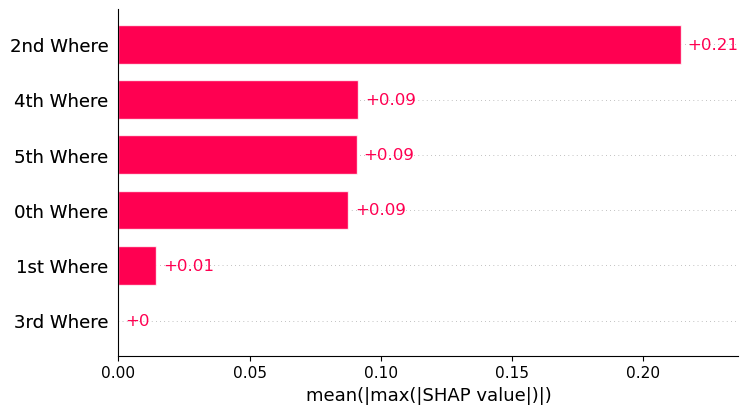

In [19]:
shap.plots.bar(shap_values.abs.max(2))
